In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

E:\ML\ANPR system\ANPR-System\yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%%writefile dataset.yaml
train: ANPR System/dataset/train/train.txt
val:ANPR System/dataset/train/val.txt

nc: 1

names: ['license_plate']

Overwriting dataset.yaml


In [13]:
%cd models
!cat yolov5s.yaml
%cd yolov5

[WinError 2] The system cannot find the file specified: 'models'
E:\ML\ANPR system\ANPR-System
E:\ML\ANPR system\ANPR-System\yolov5


'cat' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [10]:
%qtconsole
%matplotlib notebook

In [11]:
!python train.py --batch 32 --epochs 100  --data dataset.yaml --weights yolov5s.pt --cache

github: up to date with https://github.com/ultralytics/yolov5 


YOLOv5  2021-4-16 torch 1.8.1+cpu CPU

Namespace(adam=False, artifact_alias='latest', batch_size=32, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='dataset.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\exp4', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=32, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-16 02:13:30.714586: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-04-16 02:13:30.714647: I tensorflo

In [14]:
import os
try:
 from PIL import Image
except ImportError:
 import Image


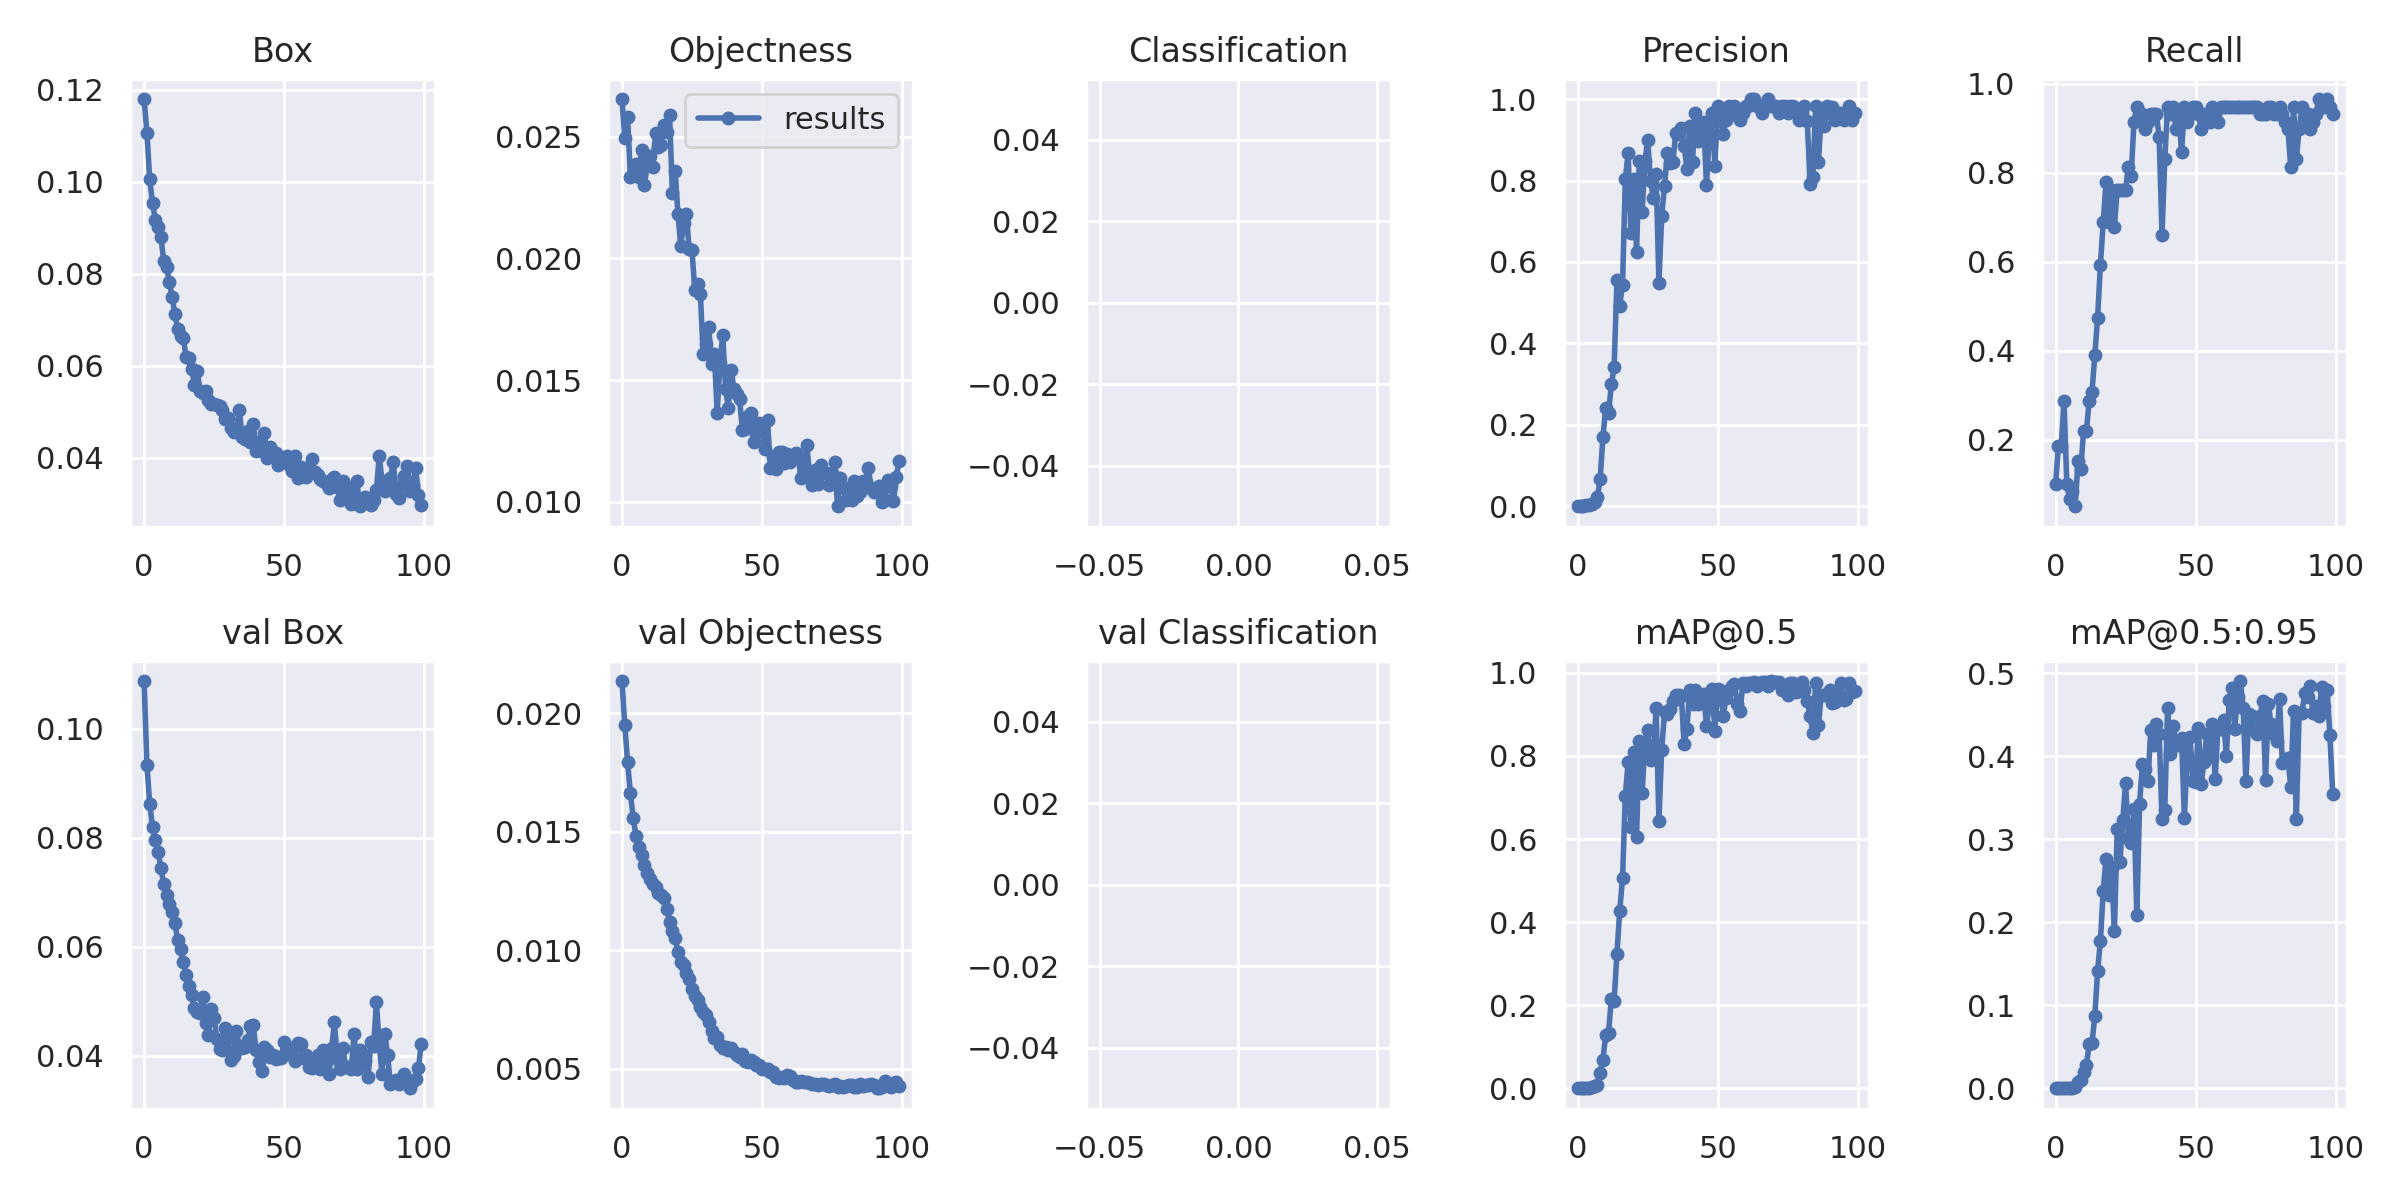

In [16]:
image= Image.open('yolov5/runs/train/exp3/results.png')
image

In [17]:
!python detect.py --weights ./yolov5/runs/train/exp3/weights/best.pt --source ../dataset/test/images/ --save-txt --exist-ok --save-conf


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=True, save_txt=True, source='../dataset/test/images/', update=False, view_img=False, weights=['./yolov5/runs/train/exp3/weights/best.pt'])
Fusing layers... 
image 1/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car0.png: 480x640 1 license_plate, Done. (1.085s)
image 2/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car1.png: 480x640 1 license_plate, Done. (0.593s)
image 3/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car10.png: 448x640 1 license_plate, Done. (0.579s)
image 4/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car100.png: 576x640 2 license_plates, Done. (0.786s)
image 5/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car101.png: 256x640 1 license_plate, Done. 

YOLOv5  2021-4-16 torch 1.8.1+cpu CPU

Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS



image 56/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car56.png: 320x640 1 license_plate, Done. (0.586s)
image 57/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car57.png: 576x640 1 license_plate, Done. (0.695s)
image 58/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car58.png: 480x640 1 license_plate, Done. (0.586s)
image 59/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car59.png: 384x640 1 license_plate, Done. (0.470s)
image 60/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car6.png: 416x640 1 license_plate, Done. (0.541s)
image 61/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car60.png: 384x640 1 license_plate, Done. (0.486s)
image 62/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\images\licensed_car61.png: 448x640 1 license_plate, Done. (0.559s)
image 63/103 E:\ML\ANPR system\ANPR-System\yolov5\..\dataset\test\ima

In [18]:
%cd ..

E:\ML\ANPR system\ANPR-System


In [19]:
PATH='dataset/test'

def decode_yolo_format(img_name,width,height):
    
    img_result_path=f'./yolov5/runs/detect/exp/labels/{img_name}.txt'
    
    #creates a file if not exists
    if not os.path.exists(img_result_path):
        with open(img_result_path, 'w'): pass
        
    label_file=open(img_result_path)
    
    labels=label_file.readlines()
    f=open(f'{PATH}/bounding_boxes_pred/{img_name}.txt','w')
    
    for label in labels:
        s=label.replace('\n','').split(' ')
        s=[ float(i) for i in s]

        bottom_x=((2*s[1]+s[3])/2)
        top_x=bottom_x-s[3]

        bottom_y=((2*s[2]+s[4])/2)
        top_y=bottom_y-s[4]

        top_x=int(top_x*width)
        bottom_x=int(bottom_x*width)

        top_y=int(top_y*height)
        bottom_y=int(bottom_y*height)

        conf=s[5]
        
        f.write(f'0 {conf} {top_x} {top_y} {bottom_x} {bottom_y} \n')
    
    f.close()
    label_file.close()

In [21]:
#extracting bounding box of each image to calculate mAP of yolo
for img in os.listdir(f'{PATH}/images'):
    
    #extracting file name, eg: Car1 from Car1.png
    f_name=img.split('.')[0]
    
    #get image size
    img_path=f'{PATH}/images/{img}'
    width,height=Image.open(img_path).size   
    
    #getting predicting bounding box
    decode_yolo_format(f_name,width,height)

In [74]:
!git clone https://github.com/Cartucho/mAP

Cloning into 'mAP'...
remote: Enumerating objects: 908, done.
remote: Total 908 (delta 0), reused 0 (delta 0), pack-reused 908
Receiving objects: 100% (908/908), 14.71 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (321/321), done.
Checking out files: 100% (269/269), done.


In [75]:
import shutil
    
#move all files from one directory to another
def move_all_files(source_dir,target_dir):

    file_names = os.listdir(source_dir)

    for file_name in file_names:
        shutil.copy(os.path.join(source_dir, file_name), target_dir)

In [77]:
def clear_dir(dir):
    
    for f in os.listdir(dir):
        os.remove(os.path.join(dir,f))

In [78]:
clear_dir('./mAP/input/ground-truth/')
clear_dir('./mAP/input/detection-results/')
clear_dir('./mAP/input/images-optional/')

#moving ground truth files
move_all_files('./dataset/test/bounding_boxes/','./mAP/input/ground-truth/')

#moving yolo predictions
move_all_files('./dataset/test/bounding_boxes_pred/','./mAP/input/detection-results/')

#moving images(optional)
move_all_files('./dataset/test/images/','./mAP/input/images-optional/')

In [22]:
!python ./mAP/main.py

65.26% = 0 AP 
mAP = 65.26%


Traceback (most recent call last):
  File "./mAP/main.py", line 753, in <module>
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

